In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
df=pd.read_csv(r'C:/Users/Dhanashree/Downloads/archives/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [4]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


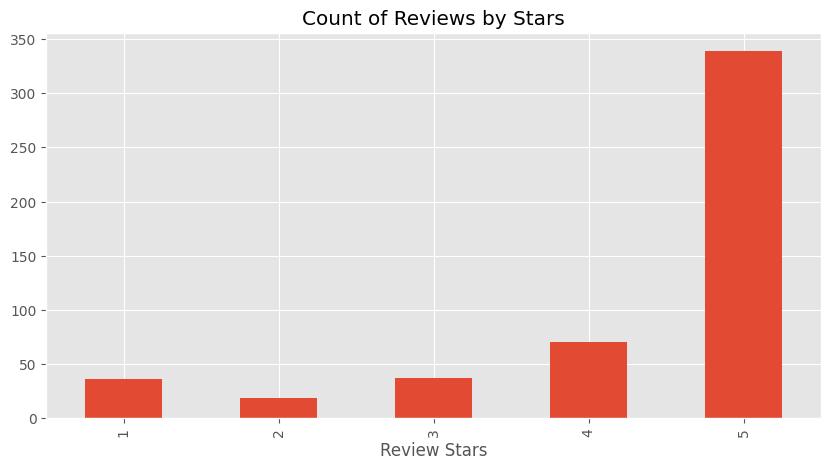

In [5]:
ax = df['Score'].value_counts().sort_index()\
.plot(kind='bar',
      title='Count of Reviews by Stars',
      figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
example= df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
tokens=nltk.word_tokenize(example) #word_tokenize is a inbuilt function of nltk that is used to split a sentence into words 
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [8]:
tagged = nltk.pos_tag(tokens) #gives us part of speech tag
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

VADER(Valence Aware Dictionary and Sentiment Reasoner)-Bag od words approach

WE'll use NLTK's SentimentIntensityAnayyzer to get the neg/neu/pos scores of the text  this uses the "Bag of words approach":
1. Stop words are removed
2. each word is scored and combined into total score

In [9]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dhanashree\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer #SentimentIntensityAnalyzer is a class provided by NLTK for sentiment analysis. It analyzes the sentiment of text by assigning scores to words and then aggregating them to determine the overall sentiment of the text.
from tqdm.notebook import tqdm #library for creating progress bars in loops and other iterative processes.
sia = SentimentIntensityAnalyzer() #sia is an object(instance) of class SentimentIntensityAnalyzer


In [11]:
sia.polarity_scores("I am so happy") #function that calculates the score of the piece of text

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [12]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [13]:
#run the polarity score on the entire dataset
res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
# here tqdm is used to monitor the progress of the loop as it iterates oover each row of the dataframe

  0%|          | 0/500 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T # T is n attribute that transposes the dataframe swapping the rows and columns, so that the sentiment scores become column headers and the IDs become row indices.
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [15]:
#now we've sentiment score and metatdata
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot Vader Results


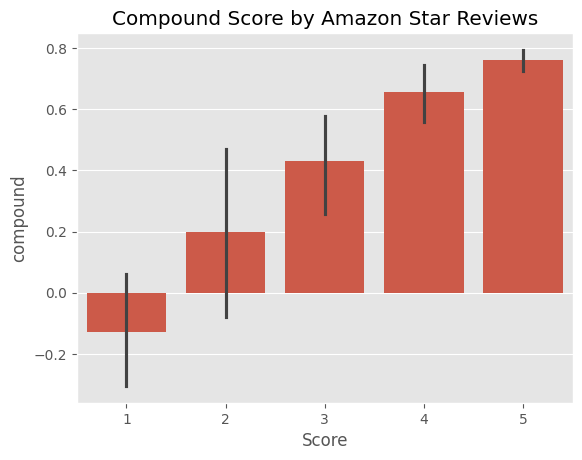

In [16]:
ax = sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

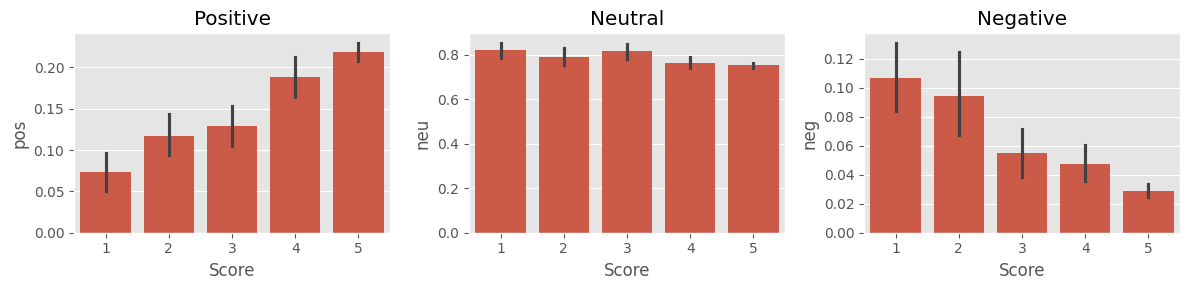

In [25]:
fig, axs = plt.subplots(1,3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In short the model picks up each word and scores it individually bit does not work well with the context of sentence or sarcasm

Roberta Pre-trained Model
It is a tramsformer model that accounts for the words but also the context related to other words

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.
